In [1]:
#Thresholding

In [2]:
%matplotlib inline

/Users/rolland/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#import libraries

In [2]:
from PIL import Image
import numpy as np
from skimage import data
from skimage.morphology import disk
from matplotlib import pyplot as plt
from skimage.filters.rank import entropy
import math

/Users/rolland/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
#loading images

In [4]:
im = Image.open('samples/29  ≥π‹ Í⁄√≈.bmp')
im2 = Image.open('samples/30  ≥π‹ ≥›◊¥œﬂ.bmp')
im3 = Image.open('samples/34  ≥π‹÷–…œ.bmp')

npimg1 = np.array(im);
npimg2 = np.array(im2);
npimg3 = np.array(im3);
print(npimg1.shape,npimg2.shape,npimg3.shape);

((1080, 1920, 3), (1080, 1920, 3), (1080, 1920, 3))


In [13]:
#renyi entropy

In [9]:
import skimage.exposure as imexp

def renyi_seg_fn(im,alpha,coef):
    hist = imexp.histogram(im)
    
    #convert all values to float
    hist_float = [float(i) for i in hist[0]]
    
    #compute the pdf
    pdf = hist_float/np.sum(hist_float)
    
    #compute the cdf
    cumsum_pdf = np.cumsum(pdf)
    
    s = 0
    e = 255 # asuming 8 bit image
    scalar  = 1.0/(1-alpha)
    
    #A very small balue to prevent divition by zero
    eps = np.spacing(1)
    rr= e-s
    
    #the second parentheses is needed because the parameters are tuple
    h1 = np.zeros((rr,1))
    h2 = np.zeros((rr,1))
    
    #the following llop coputes h1 and h2 values used to compute the entropy
#     print (len(pdf),len(cumsum_pdf))
    for ii in range(1,rr):
           
        iidash = ii+s
        if(iidash==len(pdf)):   #temporatry fix for out of bound issue
            break
        temp1 = np.power(pdf[1:iidash]/cumsum_pdf[iidash],scalar)
        h1[ii] = np.log(np.sum(temp1)+eps)
        temp2 = np.power(pdf[iidash+1:255]/(1-cumsum_pdf[iidash]),scalar)
        h2[ii] = np.log(np.sum(temp2)+eps)
        
    T = h1 + h2
    
    #Entropy value is calculated 
    T = -T*scalar
    
    
    #location where the maximum entropy occurs is the threshold for the renyi entropy
    location = T.argmax(axis=0)
    
    sortedLocation = sorted(T.ravel())
    
    print(max(sortedLocation))
    print(sortedLocation[-3:])
    print(sortedLocation[:2])
    print(location)
    
    #show histogram
    
#     fig, axes= plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
    
#     axes.hist(location)
#     plt.show()
   
    
    #location value is used as the threshold
    thresh = location
    
#     print (thresh)
    threshedImg = im < thresh*coef
    print ("done--")
    
    return threshedImg

In [7]:
#addapted entropies

In [10]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value


#TODO SHOULD PLAY WITH THE STRUCTURE ELEMENT FOR DIFFERENT RESULTS


@adapt_rgb(each_channel)
def renyi_seg_each(image,alpha,coef):
    return renyi_seg_fn(image,alpha,coef)

@adapt_rgb(hsv_value)
def renyi_seg_hsv(image,alpha,coef):
    return renyi_seg_fn(image,alpha,coef)

In [12]:
#adapted filters

In [11]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage.filters import rank
from skimage.morphology import disk

selem = disk(20)

@adapt_rgb(each_channel)
def mean_percentile_each(image):
    return rank.mean_percentile(image, selem=selem, p0=.1, p1=.9)

@adapt_rgb(hsv_value)
def mean_percentile_hsv(image):
    return rank.mean_percentile(image, selem=selem, p0=.1, p1=.9)


@adapt_rgb(each_channel)
def mean_bilateral_each(image):
    return rank.mean_bilateral(image, selem=selem, s0=500, s1=500)

@adapt_rgb(hsv_value)
def mean_bilateral_hsv(image):
    return rank.mean_bilateral(image, selem=selem, s0=500, s1=500)


@adapt_rgb(each_channel)
def mean_each(image):
    return rank.mean(image, selem=selem)

@adapt_rgb(hsv_value)
def mean_hsv(image):
    return rank.mean(image, selem=selem)


@adapt_rgb(each_channel)
def median_each(image):
    return rank.median(image, selem=selem)

@adapt_rgb(hsv_value)
def median_hsv(image):
    return rank.median(image, selem=selem)


In [10]:
#APPLYING TO SAMPLE IMAGES :BOTH HSV AND RGB 

11.6104685657
[11.610141718720707, 11.610199653454337, 11.610468565664471]
[-17.607975621045725, -17.438442466854845]
[83]
done--
11.3327201859
[11.332035590992996, 11.332693804183819, 11.332720185879134]
[-17.565874015614156, -17.395695387151946]
[64]
done--
11.3298050445
[11.329022658452164, 11.329278750881244, 11.329805044541569]
[-17.443445639026482, -17.351324831737308]
[69]
done--
11.7784207873
[11.777869943337025, 11.777881030357804, 11.778420787312763]
[-17.523780893012887, -17.353786569046662]
[90]
done--
11.6235615249
[11.622994215220317, 11.623393356895196, 11.623561524930953]
[-17.306216260369229, -17.170990741122257]
[63]
done--
11.7077268136
[11.706878183941862, 11.707597636876745, 11.707726813596139]
[-17.14750721613321, -17.031666131276673]
[47]
done--
11.3155719659
[11.315398373027254, 11.315421851238753, 11.315571965853717]
[-17.769478775594539, -17.600024042009885]
[108]
done--
11.4090826781
[11.408735197919299, 11.408951008844593, 11.409082678091233]
[-17.5283787363

/Users/rolland/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/rolland/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in power



[11.651164395747495, 11.651529948697558, 11.651562289368636]
[-17.241374853730822, -17.080412932364389]
[66]
done--
inf
[inf, inf, inf]
[0.0, 8.2500781577449267]
[1]
done--
11.7052031182
[11.704962289676027, 11.705183362343144, 11.705203118151502]
[-17.57355023470884, -17.404911618889038]
[126]
done--
11.3937780087
[11.3935184776012, 11.393735941807098, 11.393778008697192]
[-17.520592749413041, -17.354608963836096]
[94]
done--
11.3893461316
[11.389036729805108, 11.389259298145173, 11.389346131611063]
[-17.292018739218101, -17.123702614850579]
[74]
done--
11.8900216869
[11.889331525189144, 11.889608168534494, 11.890021686917098]
[-17.490399229238598, -17.299089218641623]
[74]
done--
11.3691626789
[11.368303282032944, 11.368996650891706, 11.369162678932399]
[-17.564986758309605, -17.374427175578166]
[63]
done--
11.3258708002
[11.325414771369424, 11.325594019927159, 11.325870800236164]
[-17.456523146107045, -17.333685329035188]
[69]
done--
12.0334300168
[12.033063433760056, 12.0330810456

/Users/rolland/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in power


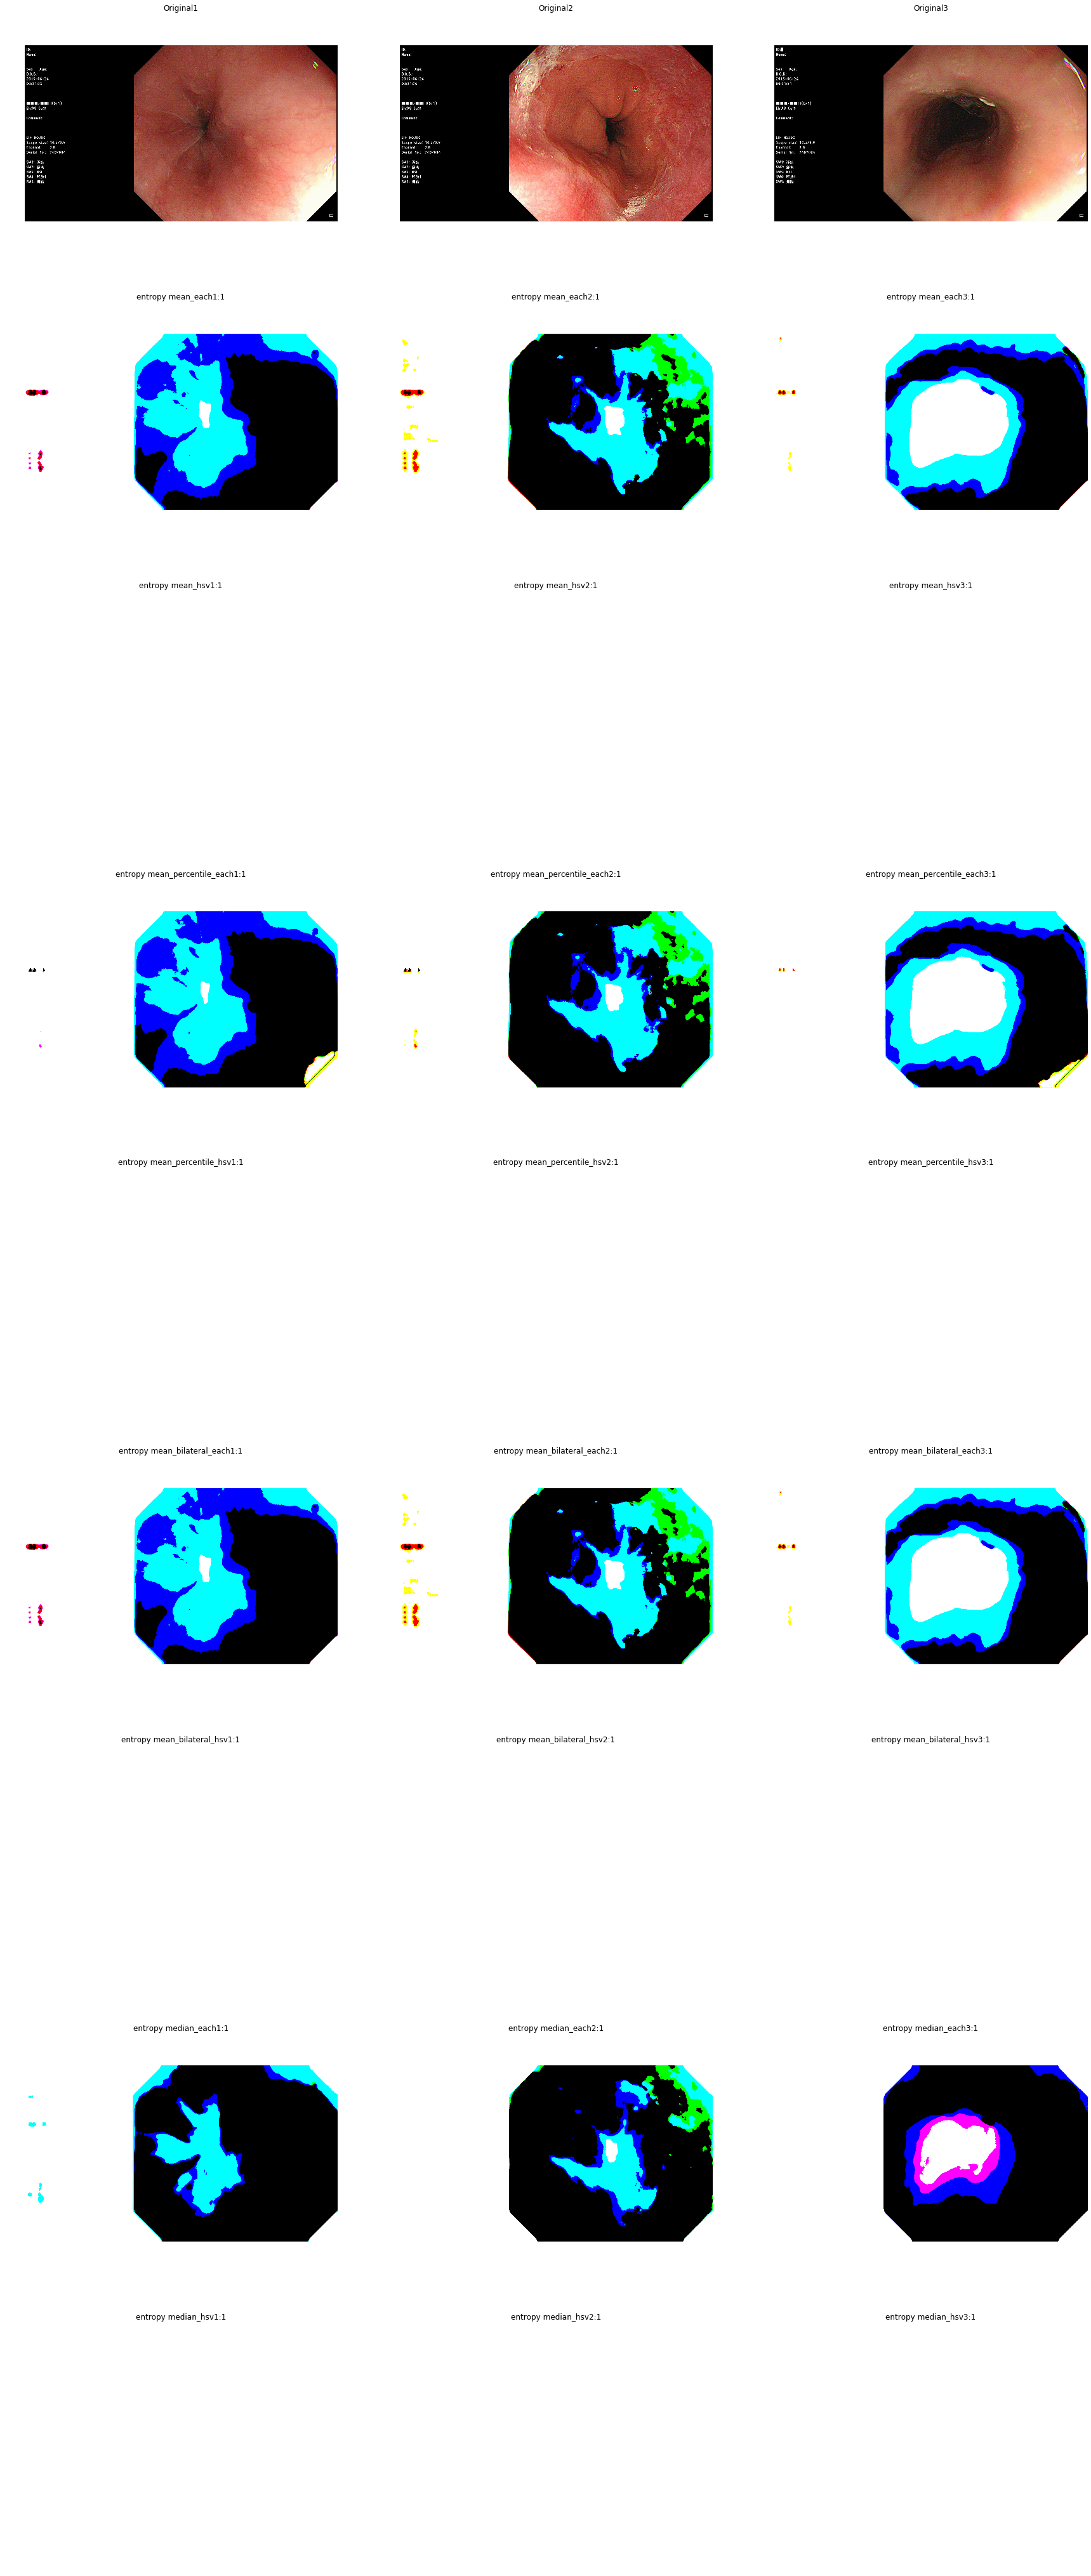

In [10]:
import math 

targetImg_titles = ['Original1','Original2','Original3']
srcImg = [npimg1,npimg2,npimg3]
displayImg = [npimg1,npimg2,npimg3]
myFiltersNames = ['entropy mean_each','entropy mean_hsv','entropy mean_percentile_each', 'entropy mean_percentile_hsv'
                  ,'entropy mean_bilateral_each','entropy mean_bilateral_hsv'
                  ,'entropy median_each','entropy median_hsv']
myEntropies = [renyi_seg_each]
myFilters = [mean_each,mean_hsv,mean_percentile_each,mean_percentile_hsv
             ,mean_bilateral_each,mean_bilateral_hsv,median_each,median_hsv]




 
###the higher the value of alpha the fewer the number of abnormal tissues detected
#alpha = 3
alpha = 2.5    
###this coeficient is needed the detect the abonomal soft tissues
# coef = 0.01
coef = 1

#Dynamically prepare data for plotting
for n in range(0,len(myFilters)):
        for k in range(0,len(myEntropies)):
               for m in range(0,len(srcImg)):
                    displayImg.append(myEntropies[k](myFilters[n](srcImg[m]),alpha,coef))
                    targetImg_titles.append(myFiltersNames[n]+str(m+1)+":"+str(k+1))
            
         

#Dynamically plotting
mycols = len(srcImg)
myrows = int(math.ceil(float(len(displayImg))/float(mycols)))
print(myrows)
fig, axes= plt.subplots(myrows, mycols, figsize=(30, 8*myrows), sharex=True, sharey=True)
ax = axes.ravel()

for rrr in range(mycols*myrows):
    ax[rrr].imshow(displayImg[rrr],cmap='gray')
    ax[rrr].set_title(targetImg_titles[rrr])
    ax[rrr].axis('off')
    
plt.show()

In [1]:
#HSV ONLY

In [12]:
import math 

targetImg_titles = ['Original1','Original2','Original3']
srcImg = [npimg1,npimg2,npimg3]
displayImg = [npimg1,npimg2,npimg3]
myFiltersNames = ['entropy mean_hsv', 'entropy mean_percentile_hsv'
                  ,'entropy mean_bilateral_hsv','entropy median_hsv']
myEntropies = [renyi_seg_each]
myFilters = [mean_hsv,mean_percentile_hsv
             ,mean_bilateral_hsv,median_hsv]




 
###the higher the value of alpha the fewer the number of abnormal tissues detected
#alpha = 3
alpha = 2.5    
###this coeficient is needed the detect the abonomal soft tissues
# coef = 0.01
coef = 1

print "myFiltersNames"
print len(myFiltersNames)
print "myFilters"
print len(myFilters)

#Dynamically prepare data for plotting
for n in range(0,len(myFilters)):
        for k in range(0,len(myEntropies)):
               for m in range(0,len(srcImg)):
                    displayImg.append(myEntropies[k](myFilters[n](srcImg[m]),alpha,coef))
                    targetImg_titles.append(myFiltersNames[n]+str(m+1)+":"+str(k+1))
            
         

#Dynamically plotting
mycols = len(srcImg)
myrows = int(math.ceil(float(len(displayImg))/float(mycols)))
print(myrows)
fig, axes= plt.subplots(myrows, mycols, figsize=(30, 8*myrows), sharex=True, sharey=True)
ax = axes.ravel()

for rrr in range(mycols*myrows):
    ax[rrr].imshow(displayImg[rrr],cmap='gray')
    ax[rrr].set_title(targetImg_titles[rrr])
    ax[rrr].axis('off')
    
plt.show()

myFiltersNames
4
myFilters
4
12.1690397706
[12.168939903787351, 12.168950424568695, 12.169039770618591]
[-17.335471619800522, -17.167331550543381]
[122]
done--
11.3544266282
[11.354320191830542, 11.354424336667417, 11.354426628211954]
[-17.54617203372058, -17.379914820723119]
[73]
done--
11.4160041896
[11.415879706460544, 11.415889454529594, 11.416004189609781]
[-17.353761195854432, -17.188125530776297]
[94]
done--
12.3034247475
[12.300107629329403, 12.30166538483968, 12.303424747509002]
[-17.265607191517621, -17.101131753777068]
[101]
done--
11.6515622894

/Users/rolland/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/Users/rolland/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in power



[11.651164395747495, 11.651529948697558, 11.651562289368636]
[-17.241374853730822, -17.080412932364389]
[66]
done--
inf
[inf, inf, inf]
[0.0, 8.2500781577449267]
[1]
done--
11.7052031182
[11.704962289676027, 11.705183362343144, 11.705203118151502]
[-17.57355023470884, -17.404911618889038]
[126]
done--
11.3937780087
[11.3935184776012, 11.393735941807098, 11.393778008697192]
[-17.520592749413041, -17.354608963836096]
[94]
done--
11.3893461316
[11.389036729805108, 11.389259298145173, 11.389346131611063]
[-17.292018739218101, -17.123702614850579]
[74]
done--
12.5340517949
[12.533897121949096, 12.533906176448932, 12.534051794910994]
[-17.173041955041086, -16.981859039541469]
[88]
done--
11.3759768774
[11.375797208703549, 11.375960773749023, 11.375976877369448]
[-17.550880361866071, -17.360743443477698]
[71]
done--
11.4028043415
[11.402727554881409, 11.402780457940191, 11.402804341501604]
[-17.367616339064753, -17.183258993015784]
[88]
done--
12.6385039938
[12.637362043124654, 12.6377016318

/Users/rolland/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in power
